# U.S. Medical Insurance Costs

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline
import csv
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Load CSV

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
age = df.age
sex = df.sex
bmi= df.bmi
children = df.children
smoker = df.smoker
region = df.region
charges = df.charges
males = df[df.sex == 'male']
females = df[df.sex == 'female']

In [4]:
class Patient_Info:
    def __init__(self, age, sex, bmi, children, smoker, region, charges):
        self.age = age
        self.sex = sex
        self.bmi = bmi
        self.children = children
        self.smoker = smoker
        self.region = region
        self.charges = charges    
    
    def sex_count(self):
        male = 0
        female = 0 
        for i in sex:
            if i == "male":
                male +=1
            elif i == "female":
                female +=1
        return "Males: "+ str(male) + " , " + "Females: "+ str(female)
    
    def average_age(self):
        mean_charge = charges.mean()
        median_charge = charges.median()
        modal_charge = charges.mode()
        
        return "Mean: " + str(mean_charge) + ' , ' + "Median: " + str(median_charge) + ' , ' + "Mode: " + str(modal_charge)
    
    def average_bmi(self):
        bmi_mean = df.groupby(['age', 'sex']).bmi.mean()
        return bmi_mean
    
    def average_charge(self):
        bmi_mean = df.groupby(['age', 'sex','bmi']).charges.mean()
        return bmi_mean
    
    def males(self):
        males_selected = males.groupby(['age','region','smoker','bmi']).charges.mean()
        return pd.DataFrame(males_selected)

    def females(self):
        females_selected = females.groupby(['age','region','smoker','bmi']).charges.mean()
        return pd.DataFrame(females_selected)
    
    def average_cost_by_age(self):
        cost_by_age = df.groupby(['age','sex']).charges.mean()
        return cost_by_age
    #def smoker_count(self):
        #female_smokers = 0
        #male_smokers = 0
        #female_non_smokers = 0
        #male_non_smokers = 0
        #for i in df.smoker:
            #if i == 'Yes' and df.sex == 'female':
             #   female_smokers +=1
            #elif i == 'Yes' and df.sex == 'male':
             #   male_smokers +=1
            #elif i == 'No' and df.sex == 'female':
             #   female_non_smokers += 1
            #elif i == 'No' and df.sex == 'male':
             #   male_non_smokers += 1
        #return 'Female smokers: '+ str(female_smokers) + 'Male smokers: ' + str(male_smokers) + 'Female Non-smokers: ' + str(female_non_smokers) + 'Male Non-smokers: ' + str(male_non_smokers)

In [5]:
patient_info = Patient_Info(sex, age, bmi, children, smoker, region, charges)
males_info = patient_info.males()
females_info = patient_info.females()
age_cost = pd.DataFrame(patient_info.average_cost_by_age())

Text(0.5, 0, 'Charges')

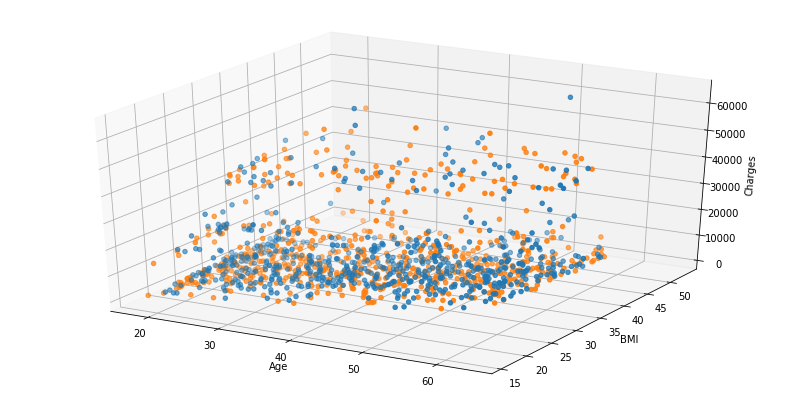

In [6]:
female_x = np.array(females.age)
female_y = np.array(females.charges)
female_z = np.array(females.bmi)

male_x = np.array(males.age)
male_y = np.array(males.charges)
male_z = np.array(males.bmi)

plt.figure(figsize=(14,7.2))
ax = plt.axes(projection='3d')
ax.scatter3D(female_x, female_z,female_y, cmap='Greens');
ax.scatter3D(male_x, male_z, male_y, cmap='Reds');
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')



Text(0.5, 1.0, 'Male age against insurance price')

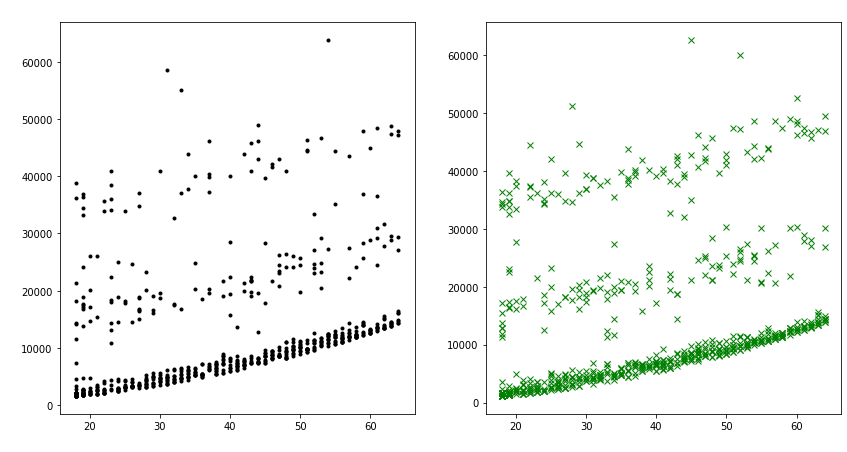

In [7]:
plt.figure(figsize=(14,7.2))
plt.subplot(1,2,1)
plt.scatter(females.age, females.charges, marker = '.', linestyle = 'None', linewidth = 1, color = "Black")
plt.xlabel('Age', color = 'White')
plt.ylabel('Charges', color = 'White')
plt.title('Female age against insurance price', color = 'White')
plt.subplot(1,2,2)
plt.scatter(males.age, males.charges, marker = 'x', linestyle = 'None', linewidth = 1, color = "Green")
plt.xlabel('Age', color = 'White')
plt.ylabel('Charges', color = 'White')
plt.title('Male age against insurance price', color = 'White')

[]

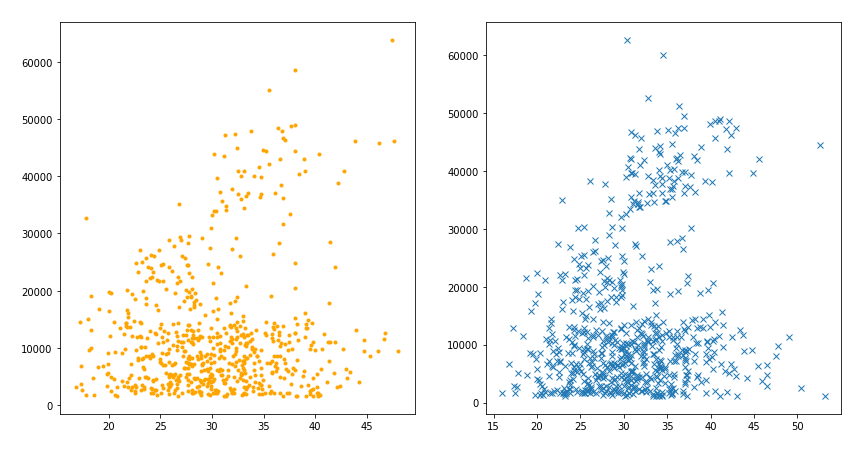

In [8]:
plt.figure(figsize=(14,7.2))
plt.subplot(1,2,1)
plt.scatter(females.bmi, females.charges, marker = '.', linestyle = 'None', linewidth = 1, color = "Orange")
plt.xlabel('BMI', color = 'White')
plt.ylabel('Charges', color = 'White')
plt.title('Female age against insurance price', color = 'White')
plt.subplot(1,2,2)
plt.scatter(males.bmi, males.charges, marker = 'x', linestyle = 'None', linewidth = 1)
plt.xlabel('BMI', color = 'White')
plt.ylabel('Charges', color = 'White')
plt.title('Male age against insurance price', color = 'White')
plt.plot()

In [9]:
df.replace(to_replace = 'male', value = '1', inplace=True)
df.replace(to_replace = 'female', value = '0', inplace=True)
df.replace(to_replace = 'yes', value = '1', inplace=True)
df.replace(to_replace = 'no', value = '1', inplace=True)
df.replace(to_replace = 'southwest', value = '1', inplace=True)
df.replace(to_replace = 'southeast', value = '2', inplace=True)
df.replace(to_replace = 'northwest', value = '3', inplace=True)
df.replace(to_replace = 'northeast', value = '4', inplace=True)
males.replace(to_replace = 'yes', value = '1', inplace=True)
males.replace(to_replace = 'no', value = '1', inplace=True)
males.replace(to_replace = 'southwest', value = '1', inplace=True)
males.replace(to_replace = 'southeast', value = '2', inplace=True)
males.replace(to_replace = 'northwest', value = '3', inplace=True)
males.replace(to_replace = 'northeast', value = '4', inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [18]:
X = df.drop(columns = ['charges','smoker', 'region', 'sex'])
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520


In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
predictions = model.predict(X_test)

In [22]:
accuracy = model.score(X_test, y_test)

In [23]:
print(accuracy)

0.06599503054210276


In [16]:
print(X_test)

      age sex    bmi smoker region
42     41   1  21.78      1      2
930    26   1  46.53      1      2
901    60   1  40.92      1      2
1335   18   0  36.85      1      2
774    41   1  34.20      1      3
...   ...  ..    ...    ...    ...
676    55   0  40.81      1      2
13     56   0  39.82      1      2
878    41   1  28.80      1      1
476    24   1  28.50      1      4
803    18   0  42.24      1      2

[268 rows x 5 columns]


In [17]:
print(predictions)

[10786.93571319 16070.25458323 22512.95435414  9699.86866247
 15933.03768775 15247.86108558  8577.72897525 17359.73959339
 11147.19687214 19963.42278404 17001.90051407 13419.77073936
 17011.86049082 15325.47694832 12831.59411518 11411.95729689
 10832.37027632 11666.11369231 17251.89205824 21987.75180858
 22067.11363811  9609.1529889  19917.92734395 11215.34764107
 10926.01928575  7496.85010486 15504.98429395 20582.98000327
 11715.53758084 16839.05969846 14755.97130108 19403.50613191
 11475.08090249 14212.0048455  10863.48811231 13068.73685043
 14552.65650882 17205.59768775 10542.53243895 12405.37533818
 18759.70426491 11445.04112921 23003.86220418 16208.11234443
 21036.45046161 20248.01022923 15080.50828857  6285.13618847
  7449.6638709  14642.87907363 20864.20010661 14366.01572482
 14952.09925206 10315.19622777 12896.31273961 14057.88501303
  5384.29051486 15103.71582896 12094.25574028 16124.11640223
 14528.51511016 10953.12749736 13635.88271183 14770.99688761
 18543.7770707  18545.88